In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import rlway.osrd.infra as infr

In [23]:
infra, sim, res = infr.read_jsons_in_dir('.')

In [24]:
from rlway.schedules import Schedule
from rlway.schedule_from_osrd import schedule_from_simulation

In [25]:
s = schedule_from_simulation(infra, res, simplify_route_names=False)
# s.draw_graph()

In [26]:
routes_switches = {
    route['id']: list(route['switches_directions'].keys())[0]
    for route in infra['routes']
    if len(list(route['switches_directions'].keys())) != 0
}
routes_switches

{'rt.DA1->DA_out': 'CVG', 'rt.DA2->DA_out': 'CVG'}

In [27]:
s

                               0         
                               s        e
CVG                       24.946   32.122
rt.buffer_stop.0->DA1        0.0   26.352
rt.buffer_stop.1->DA2        NaN      NaN
rt.DA_out->DB_in          30.975  554.183
rt.DB_in->buffer_stop.2  553.308  592.366

In [28]:
infr.draw_infra(infra)

In [29]:
infr.draw_infra(infra, remove_bufferstop_to_bufferstop=False)

<Axes: xlabel='Time', ylabel='Track sections'>

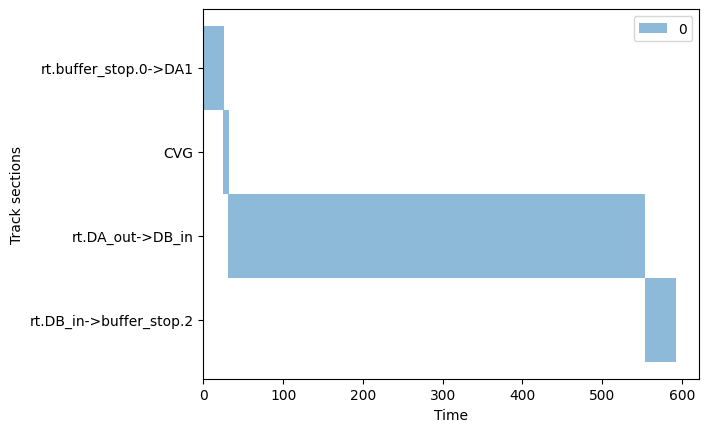

In [30]:
s.sort().plot()